<a href="https://colab.research.google.com/github/Sandesh10/Data-Challenge-2020/blob/master/Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How do respondents who reported having health and wellness apps on their tablet or smartphone (B7) differ from those who do not have these apps based on factors such as:

    a. (1) information-related self-efficacy (A5);
    b. (2) health-related self-efficacy (F2 &amp; N4);
    c. (3) Self-reported health status (F1);
    d. (4) barriers they faced while searching for health information (A4)
    e. (5) their perceptions regarding the healthcare they have received over the past year (C3 &amp; C6);
    f. (6) their participation in cancer screenings (L1 – L4)?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

In [0]:
df = pd.read_excel('data_level4.xlsx')

In [0]:
'''
    Preprocessing steps:
    1. Removing all the columns after index 359. This includes all columns after `MAILNUM` column. 
    2. Remove all the columns with object datatype. 
'''
def preprocess_df(df):
  remove_df = df.iloc[:,359:]
  df = df.drop(remove_df.columns, axis=1)
  object_cols = list(df.select_dtypes(include=['object']).columns)
  print('Removing following columns', object_cols)
  date_cols = list(df.select_dtypes(include=['datetime']).columns)
  print('Removing following columns', date_cols)
  new_df = df.drop(object_cols, axis=1)
  new_df = new_df.drop(date_cols, axis=1)
  print('Removing column : Prompt . [P.S. This contains NaN]')
  new_df = new_df.drop(['Prompt'],axis =1)
  print("New dataframe shape ", new_df.shape)
  return new_df

In [0]:
new_df = preprocess_df(df)

Removing following columns ['PersonID', 'Stratum', 'APP_REGION', 'VAR_STRATUM', 'StrongNeedHealthInfo_OS', 'HealthIns_Other_OS', 'Caregiving_Other_OS', 'CaOther_OS', 'SexualOrientation_OS']
Removing following columns ['UpdateDate']
Removing column : Prompt . [P.S. This contains NaN]
New dataframe shape  (5438, 348)


In [0]:
def create_bar_plot(df,col_ls_1,col_ls_2, figsize = (15,7)):
  temp = df[col_ls_2]
  temp.groupby(col_ls_1).count().plot(kind='bar', figsize = figsize)

def analyse_data(df,col_1, col_2, col_3):
  #removing the rows with missing data
  temp_df = df[df[col_1]>0]
  print("Shape after Filtering ",col_1," : ",temp_df.shape)

  #removing the rows with missing data
  temp_df_2 = temp_df[temp_df[col_2]>0]
  print("Shape after Filtering ",col_2," : ",temp_df_2.shape)
  res = temp_df_2.groupby([col_1,col_2]).count()
  print(res)
  create_bar_plot(temp_df_2, [col_1,col_2], [col_1,col_2, col_3])
  print('Done!!')


TabletHealthWellnessApps

  B7. On your tablet or smartphone, do you have any "apps" related to health and wellness?

    1.  Yes       2.No         3.Don't know


ConfidentGetHealthInf

A5. Overall, how confident are you that you could get advice or information about health or medical topics if you needed it?

    1. Completely confident      2. Very confident
    3. Somewhat confident        4. A little confident
    5. Not confident at all


F2  OwnAbilityTakeCareHealth

N4  EverythingCauseCancer    and     PreventNotPossible

F1  GeneralHealth

A4  LotOfEffort    and    Frustrated

C3 QualityCare

C6 


their participation in cancer screenings (L1 – L4)?

GenderC	 : Are you male or female?
    1. Male    2. Female


EverHadPSATest	:  A PSA test is used to check for prostate cancer. Have you ever had a PSA test?

WhenPapTest	: How long ago did you have your most recent Pap test to check for cervical cancer?

WhenMammogram	:  When did you have your most recent mammogram to check for breast cancer, if ever?




Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  ConfidentGetHealthInf  :  (4393, 348)
                                                HHID  ...  MAILNUM
TabletHealthWellnessApps ConfidentGetHealthInf        ...         
1                        1                       685  ...      685
                         2                       949  ...      949
                         3                       572  ...      572
                         4                        80  ...       80
                         5                        28  ...       28
2                        1                       434  ...      434
                         2                       676  ...      676
                         3                       593  ...      593
                         4                       100  ...      100
                         5                        44  ...       44
3                        1                        49  ...       49
    

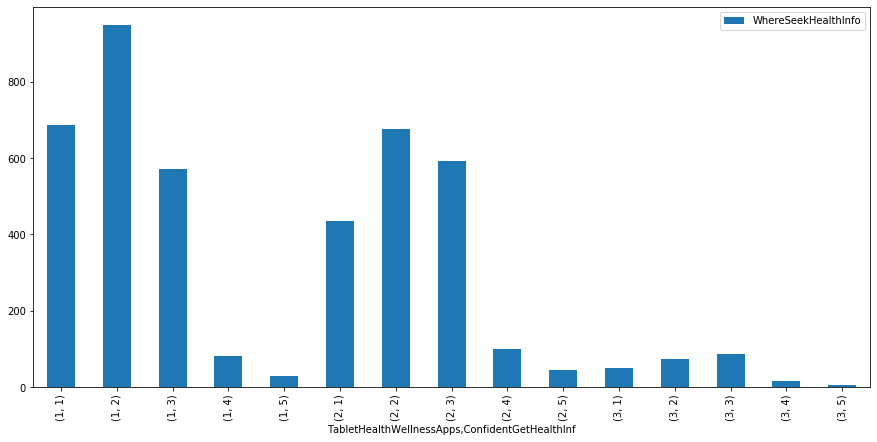

In [0]:
# ConfidentGetHealthInf vs OwnAbilityTakeCareHealth

analyse_data(new_df,'TabletHealthWellnessApps','ConfidentGetHealthInf','WhereSeekHealthInfo')

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  OwnAbilityTakeCareHealth  :  (4426, 348)
                                                   HHID  ...  MAILNUM
TabletHealthWellnessApps OwnAbilityTakeCareHealth        ...         
1                        1                          681  ...      681
                         2                         1102  ...     1102
                         3                          466  ...      466
                         4                           54  ...       54
                         5                           18  ...       18
2                        1                          457  ...      457
                         2                          871  ...      871
                         3                          442  ...      442
                         4                           76  ...       76
                         5                           24  ...       24
3                        1      

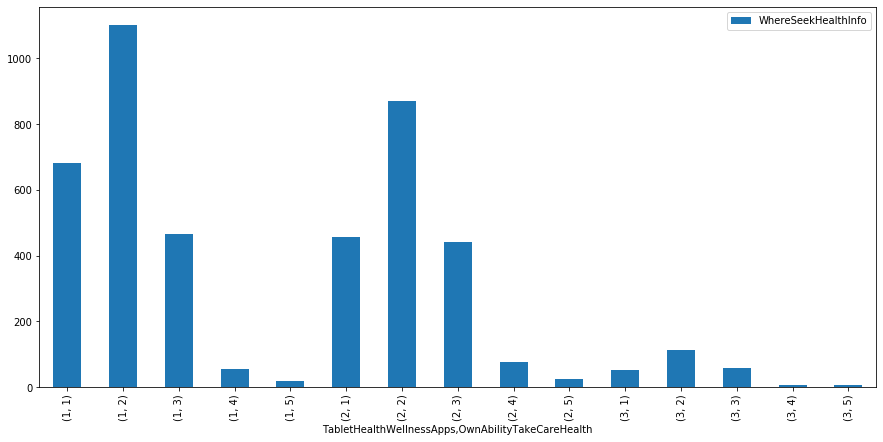

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','OwnAbilityTakeCareHealth','WhereSeekHealthInfo')

In [0]:

'''
    Graph same as above
'''
# analyse_data(new_df,'TabletHealthWellnessApps','QualityCare','WhereSeekHealthInfo')

'\n    Graph same as above\n'

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  GeneralHealth  :  (4416, 348)
                                        HHID  ...  MAILNUM
TabletHealthWellnessApps GeneralHealth        ...         
1                        1               353  ...      353
                         2               947  ...      947
                         3               766  ...      766
                         4               211  ...      211
                         5                36  ...       36
2                        1               198  ...      198
                         2               674  ...      674
                         3               691  ...      691
                         4               258  ...      258
                         5                46  ...       46
3                        1                15  ...       15
                         2                80  ...       80
                         3                85  ...       8

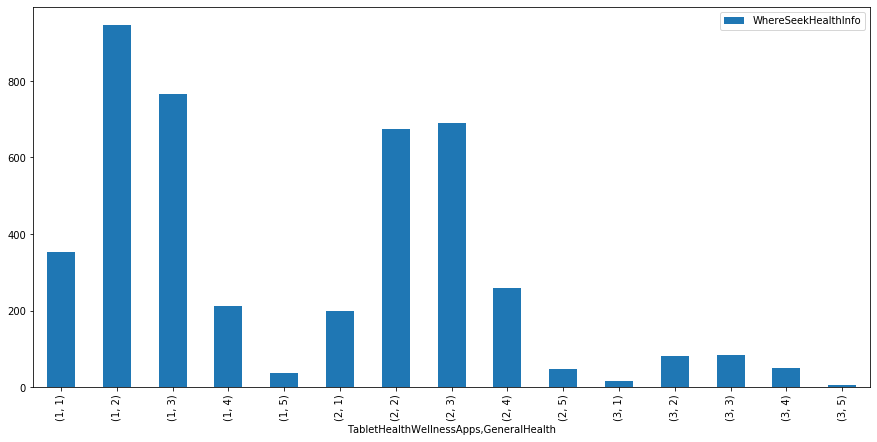

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','GeneralHealth','WhereSeekHealthInfo')

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  GenderC  :  (4389, 348)
                                  HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
TabletHealthWellnessApps GenderC                    ...                         
1                        1         900         900  ...             900      900
                         2        1407        1407  ...            1407     1407
2                        1         861         861  ...             861      861
                         2         986         986  ...             986      986
3                        1          94          94  ...              94       94
                         2         141         141  ...             141      141

[6 rows x 346 columns]
Done!!


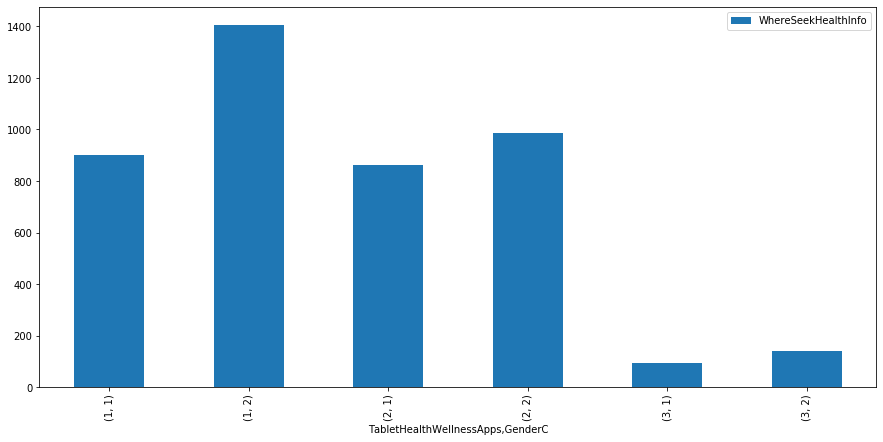

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','GenderC','WhereSeekHealthInfo')

# Observation

                Yes           No         Don't know      Total
    Male        900           861           94            1855
                48.51%        46.41%

    Female     1407           986          141            2534
               55.52%         38.91%        5.56%


CONCLUSION:

Female are more likely to use TabletHealthWelnessApps

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  EverHadPSATest  :  (1828, 348)
                                         HHID  ...  MAILNUM
TabletHealthWellnessApps EverHadPSATest        ...         
1                        1                473  ...      473
                         2                418  ...      418
2                        1                495  ...      495
                         2                353  ...      353
3                        1                 58  ...       58
                         2                 31  ...       31

[6 rows x 346 columns]
Done!!


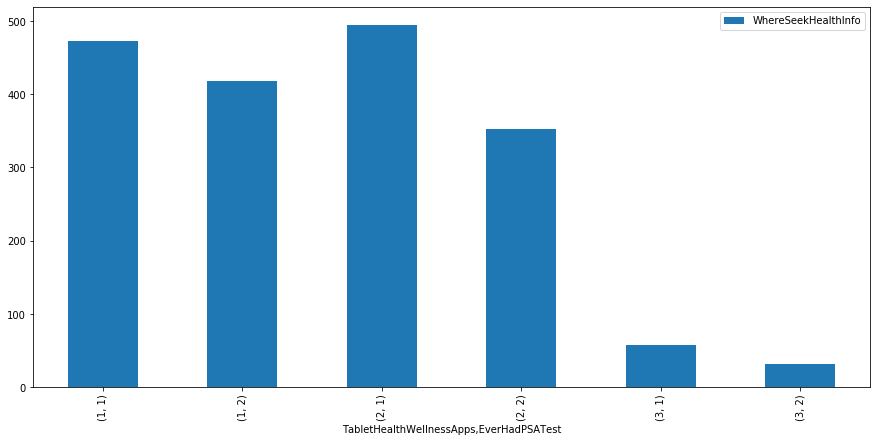

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','EverHadPSATest','WhereSeekHealthInfo')

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  WhenPapTest  :  (2495, 348)
                                      HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
TabletHealthWellnessApps WhenPapTest                    ...                         
1                        1             619         619  ...             619      619
                         2             344         344  ...             344      344
                         3             146         146  ...             146      146
                         4              90          90  ...              90       90
                         5             142         142  ...             142      142
                         6              49          49  ...              49       49
2                        1             337         337  ...             337      337
                         2             200         200  ...             200      200
                         3         

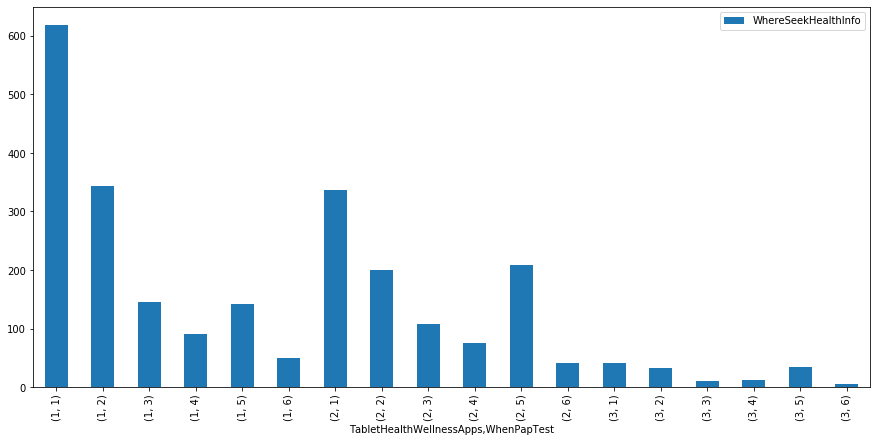

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','WhenPapTest','WhereSeekHealthInfo')

Shape after Filtering  TabletHealthWellnessApps  :  (4476, 348)
Shape after Filtering  GeneralHealth  :  (4416, 348)
                                        HHID  ...  MAILNUM
TabletHealthWellnessApps GeneralHealth        ...         
1                        1               353  ...      353
                         2               947  ...      947
                         3               766  ...      766
                         4               211  ...      211
                         5                36  ...       36
2                        1               198  ...      198
                         2               674  ...      674
                         3               691  ...      691
                         4               258  ...      258
                         5                46  ...       46
3                        1                15  ...       15
                         2                80  ...       80
                         3                85  ...       8

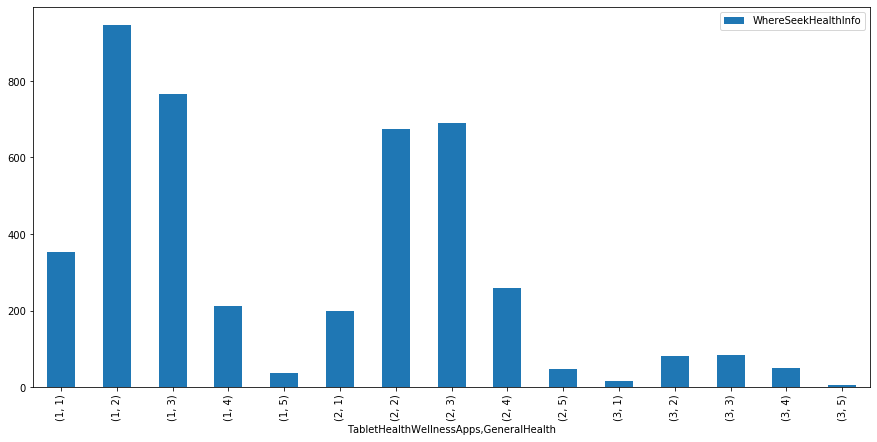

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','GeneralHealth','WhereSeekHealthInfo')

Shape after Filtering  WhenPapTest  :  (3012, 348)
Shape after Filtering  Age  :  (2938, 348)
                 HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
WhenPapTest Age                    ...                         
1           20      3           3  ...               3        3
            21      7           7  ...               7        7
            22      8           8  ...               8        8
            23     13          13  ...              13       13
            24     13          13  ...              13       13
...               ...         ...  ...             ...      ...
6           87      2           2  ...               2        2
            88      3           3  ...               3        3
            90      1           1  ...               1        1
            93      1           1  ...               1        1
            94      1           1  ...               1        1

[385 rows x 346 columns]
Done!!


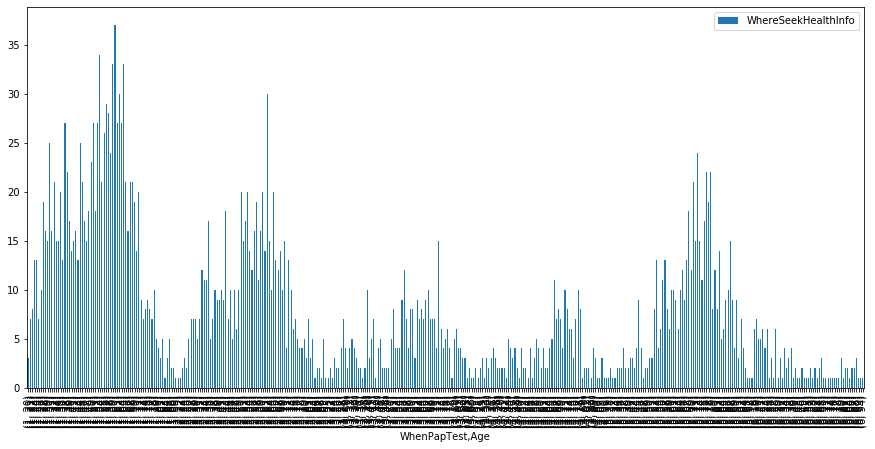

In [0]:
analyse_data(new_df,'WhenPapTest','Age','WhereSeekHealthInfo')

In [0]:
new_df['Age']

0       71
1       47
2       -9
3       65
4       45
        ..
5433    57
5434    43
5435    66
5436    27
5437    37
Name: Age, Length: 5438, dtype: int64

([<matplotlib.axis.XTick at 0x7f2cb7f139b0>,
 <a list of 10 Text xticklabel objects>)

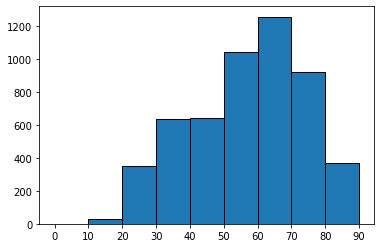

In [0]:
bins= [0,10,20,30,40,50,60,70,80,90]
plt.hist(new_df['Age'].values, bins=bins, edgecolor="k")
plt.xticks(bins)

In [0]:
bins= [0,10,20,30,40,50,60,70,80,90]
out = pd.cut(new_df['Age'], bins=bins)
counts = pd.value_counts(out)
counts

(60, 70]    1253
(50, 60]    1077
(70, 80]     828
(40, 50]     693
(30, 40]     626
(20, 30]     400
(80, 90]     319
(10, 20]      42
(0, 10]        0
Name: Age, dtype: int64

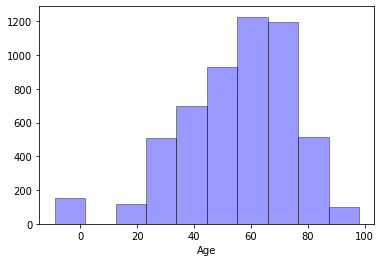

In [0]:
sns.distplot(new_df['Age'], hist=True, kde=False, 
             bins=int(100/10), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [0]:
analyse_data(new_df,'TabletHealthWellnessApps','ConfidentGetHealthInf','WhereSeekHealthInfo')